<a href="https://colab.research.google.com/github/kenzou-eu/EP1/blob/main/EP_Num%C3%A9rico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Início do programa


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import math
pi = math.pi

In [58]:
def ck(a, b, k):
    dividend = a[k]
    divisor = math.sqrt(pow(a[k], 2) + pow(b[k], 2))
    c = dividend/divisor
    return c

def sk(a, b, k):
    dividend = -b[k]
    divisor = math.sqrt(pow(a[k], 2) + pow(b[k], 2))
    s = (dividend/divisor)
    return s

def sgn(d):
    if d >=0:
        return 1
    else:
        return -1

def dk(alfa, n): #alfa(i,k) é o coeficiente i da diagonal principal da matriz A na interação k, beta é da outra diagonal
    valuedk = (alfa[n-1] - alfa[n])/2
    return valuedk

def uk(alfa, beta, d, n, k, desloc): #Heurística de wilkinson
    if k!= 0 and desloc == 1:
      valueuk = alfa[n] + dk(alfa, n) - sgn(d)*(math.sqrt(pow(dk(alfa,n), 2) + pow(beta[n-1],2)))
      return valueuk
    if k==0 or desloc == 0:
      return 0

def matA(n): #A é a matriz da diagonal principal
    A = []
    for i in range(n):
        if i==0:
            a=float(input('Digite o primeiro elemento da diagonal principal:'))
            A.append(a)
        else:
            a=float(input('Digite o próximo elemento da diagonal principal:'))
            A.append(a)
    return A

def matB(n): #B é a matriz da sub-diagonal 
    B = []
    for i in range(n-1):
        if i==0:
            b=float(input('Digite o primeiro elemento da sub-diagonal: '))
            B.append(b)
        else:
            b=float(input('Digite o próximo elemento da sub-diagonal: '))
            B.append(b)
    return B

def v(n):
    v0=[]
    for i in range(n):
        v0.append(0)
    return(v0)

def handleV(n):
  V=[]
  for i in range(n):
      V.append(v(n))
  for i in range(n):
      V[i][i]=1
  return V



In [62]:
def metodoQR(n, A, B, V, erro, desloc):
    n0=n
    A0=[]
    B0=[]
    k = 0
    for i in range(n0-2,-1,-1):
        while abs(B[i]) > erro:
            cos = []
            sen = []
            C=[]
            for j in range(n-1):
                C.append(B[j])
            valueDK = dk(A, n-1)
            valueUK = uk(A, B, valueDK, n-1, k, desloc)
            for j in range(n):
                A[j] = A[j] - valueUK
            for q in range(n-1):
                if q != (n-2):
                    cos.append(ck(A,B,q))
                    sen.append(sk(A,B,q))
                    A.insert(q+1,(cos[q]*A[q]-sen[q]*B[q]))
                    A.pop(q)
                    A.insert(q+2,(sen[q]*C[q]+cos[q]*A[q+1]))
                    C.insert(q+1,(cos[q]*C[q]-sen[q]*A[q+1]))
                    A.pop(q+1)
                    C.pop(q)
                    C.insert(q+2,(cos[q]*C[q+1]))
                    C.pop(q+1)
                if q == (n-2):
                    cos.append(ck(A,B,q))
                    sen.append(sk(A,B,q)) 
                    A.insert(q+1,(cos[q]*A[q]-sen[q]*B[q]))
                    A.pop(q)
                    A.insert(q+2,(sen[q]*C[q]+cos[q]*A[q+1]))
                    C.insert(q+1,(cos[q]*C[q]-sen[q]*A[q+1]))
                    A.pop(q+1)
                    C.pop(q)
            for q in range(n-1):
                A.insert(q+1,(cos[q]*A[q]-sen[q]*C[q]))
                A.pop(q)
                A.insert(q+2,(cos[q]*A[q+1]))
                B.insert(q+1,(-sen[q]*A[q+1]))
                A.pop(q+1)
                B.pop(q)
                for m in range(n0):
                    V[m].insert(q+1,(cos[q]*V[m][q]-sen[q]*V[m][q+1]))
                    V[m].insert(q+3,(sen[q]*V[m][q]+cos[q]*V[m][q+2]))
                    V[m].pop(q)
                    V[m].pop(q+1)
            for j in range(n):
                A[j] = A[j] + valueUK
            k = k+1
        if i!=0:
            A0.insert(0,A[n-1])
            B0.insert(0,B[n-2])
            A.pop(n-1)
            B.pop(n-2)
            n=n-1
        if i==0:
            A0.insert(0,A[n-1])
            A0.insert(0,A[n-2])
            B0.insert(0,B[n-2])
    A=A0
    B=B0
    return A, B, V, k

In [75]:
# %%
desloc = int(input("Deseja realizar o QR com deslocamento? Se sim, digite 1, se não, digite 0. "))
n = int(input("Qual a ordem da Matriz? ")) #tamanho da matriz
# A = matA(n) #cria um vetor com os elementos da diagonal principal
# B = matB(n) #cria um vetor com os elementos da sub-diagonal 
# erro = float(input("Qual o valor do erro? Digite na forma 1.0e-6 "))

A = []
for i in range(n):
  A.append(2)
B = []
for i in range(n-1):
  B.append(-1)
erro = float(1.0e-6)

V = handleV(n)

A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
print('A =',A)
print('V =')
for i in range(n):
    print(V[i])
print("O numero de interações foi: ", k)



Deseja realizar o QR com deslocamento? Se sim, digite 1, se não, digite 0. 1
Qual a ordem da Matriz? 16
A = [3.9659461993678033, 3.864944458808712, 3.700434271459229, 3.4780178344413164, 3.2052692727585135, 2.891476711553077, 2.547325980144166, 2.184536718926603, 1.8154632810733948, 1.4526740198558334, 1.108523288446923, 0.7947307272414872, 0.5219821655586817, 0.29956572854076763, 0.13505554119129207, 0.03405380063219636]
V =
[0.06302556465232725, 0.12390486929122782, 0.1805647422139731, 0.2310756994040797, 0.273717650795879, 0.3070384758776968, 0.3299034739160739, 0.34153400482475316, 0.34153400482665097, 0.32990347391160657, 0.30703847589425537, 0.2737176507075617, 0.2310757001926214, 0.180564723361729, 0.1239048954565285, 0.0630255646523043]
[-0.12390486929123519, -0.2310756994041312, -0.30703847587777383, -0.3415340048253393, -0.32990347391573566, -0.27371765079602606, -0.18056474221352387, -0.06302556465330131, 0.06302556465487762, 0.18056474220605265, 0.27371765082648913, 0.32990

In [76]:
def autovalores(n):
  A = []
  for i in range(n):
    a = 2*(1-math.cos(((i+1)*pi)/(n+1)))
    A.insert(0,a)
  return A

def autovetores(n):
  V = []
  a = 0
  for i in range(n):
    vector = []
    for j in range(n):
      v = math.sin(((j+1)*(i+1)*pi)/(n+1))
      vector.insert(0, v)
      a = a + v**2
    normalized = vector/np.sqrt(a)
    a = 0
    V.append(normalized)
  return V


n = int(input("Qual a ordem da Matriz? ")) #tamanho da matriz
Vteorico = autovetores(n)
Ateorico = autovalores(n)
print("O A teórico é: ", Ateorico)
display("O V teórico é: ", Vteorico)

Qual a ordem da Matriz? 16
O A teórico é:  [3.965946199367804, 3.8649444588087114, 3.700434271459228, 3.4780178344413186, 3.2052692727585126, 2.8914767115530755, 2.5473259801441657, 2.1845367189266036, 1.815463281073396, 1.4526740198558339, 1.1085232884469234, 0.7947307272414872, 0.5219821655586818, 0.29956572854077157, 0.13505554119128838, 0.03405380063219643]


'O V teórico é: '

[array([0.06302556, 0.12390487, 0.18056474, 0.2310757 , 0.27371765,
        0.30703848, 0.32990347, 0.341534  , 0.341534  , 0.32990347,
        0.30703848, 0.27371765, 0.2310757 , 0.18056474, 0.12390487,
        0.06302556]),
 array([-0.12390487, -0.2310757 , -0.30703848, -0.341534  , -0.32990347,
        -0.27371765, -0.18056474, -0.06302556,  0.06302556,  0.18056474,
         0.27371765,  0.32990347,  0.341534  ,  0.30703848,  0.2310757 ,
         0.12390487]),
 array([ 0.18056474,  0.30703848,  0.341534  ,  0.27371765,  0.12390487,
        -0.06302556, -0.2310757 , -0.32990347, -0.32990347, -0.2310757 ,
        -0.06302556,  0.12390487,  0.27371765,  0.341534  ,  0.30703848,
         0.18056474]),
 array([-0.2310757 , -0.341534  , -0.27371765, -0.06302556,  0.18056474,
         0.32990347,  0.30703848,  0.12390487, -0.12390487, -0.30703848,
        -0.32990347, -0.18056474,  0.06302556,  0.27371765,  0.341534  ,
         0.2310757 ]),
 array([ 0.27371765,  0.32990347,  0.12390487, -

A [88.44500562036657, 70.11383113050897, 46.7731863400594, 23.398633154561303, 6.269343754503707]
V [[0.1893346573107501, 0.47497610428602555, 0.5988223982052636, 0.5325039524890145, 0.31048569031368434], [-0.3911052075280567, -0.585382812847187, -0.10270311331950038, 0.4744456963356219, 0.5183792345480663], [0.5576611077554171, 0.18485786148930244, -0.5648687392563424, -0.0637570182596996, 0.5759340326601521], [-0.5882019988349073, 0.38295963757809504, 0.09308548584215634, -0.5173751580266018, 0.4806436962398986], [0.3927105825529496, -0.5008933517347195, 0.5505653509426998, -0.468613711164926, 0.2686321510699319]]
[-2, 0.20096239499457774, 1.9811511312566958, -0.15361488642525473, -0.19041046621815635, -0.5894179428913535, -1.3363536755385335, -1.7107923673311112, -1.63973943392653, -0.6363303729114632, 0.8967963813155063, 1.6468114526573576, 1.1612323717665836, 0.38106828668716997, 0.34706805645781613, 1.0546441111189502, 1.6917096328116408, 1.6103505688268696, 0.863836828217526, -0

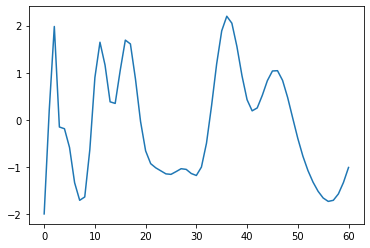

[-3, 2.5568720406610432, 1.398014096306032, 1.5538919044118322, -1.0717754752780493, -1.4914079231213881, -2.176929762731271, -2.9048928420529525, -1.6567175412717594, -0.07437240011390941, 0.28231610254942996, 0.4695640152162773, 1.5401413696364796, 2.7145966448319228, 2.7995637563860902, 1.8880810462912174, 1.0463652851892318, 0.9199155631589093, 1.1360995083756025, 0.9299556105249144, 0.02791795264656423, -1.1445534689223646, -1.9582048795083768, -2.1580191451349027, -1.9975655840643796, -1.9156801744172136, -2.121491919458223, -2.440835006956061, -2.495832170514948, -2.0239799621981476, -1.0800861511650195, 0.004772451151799889, 0.845383407141601, 1.2358357403445877, 1.2462547038682381, 1.1433914164529633, 1.206797559612693, 1.5608807903533362, 2.1148360115715135, 2.628751997272271, 2.85385768000991, 2.6640711303324576, 2.112807547340276, 1.3959168909201498, 0.7500968927783741, 0.3427056314654836, 0.20509346817129856, 0.2345140201367699, 0.2555612586130139, 0.10714736147142723, -0.

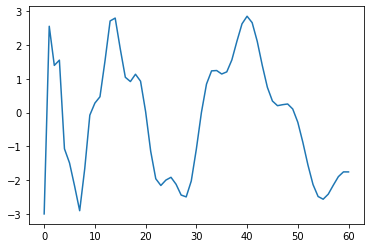

[-1, 1.72756571798185, 2.420115926428075, 0.6716594832474326, 0.41484900352066506, -3.110684519046915, -3.2993700576423297, -1.0478143307455587, -1.1153076431549453, -1.8358994075618216, -0.5642909785404333, 1.4712178441589694, 2.3099370330634765, 2.238243911067812, 2.4408539387692665, 2.8989273823044983, 2.6578066643416953, 1.3917504244903387, -0.07384698975758941, -0.717573368241402, -0.41518678014005916, 0.005408899893777151, -0.36494557168160663, -1.6729497483487668, -3.215264069896596, -4.052193753373681, -3.7224395309198877, -2.508925074487855, -1.1491691235752408, -0.294792778327067, -0.12757641673815903, -0.3472459712318798, -0.46151738359722333, -0.13589658753744535, 0.622539875212, 1.5244919831639907, 2.2176508624773934, 2.5060317376264396, 2.440862204849329, 2.2515390728318474, 2.1805835189264537, 2.329340544862802, 2.599391492260126, 2.75197411287532, 2.5433940862940303, 1.860611780448674, 0.789127081568312, -0.4155340211725787, -1.4339407772267205, -2.0145143379498163, -2.

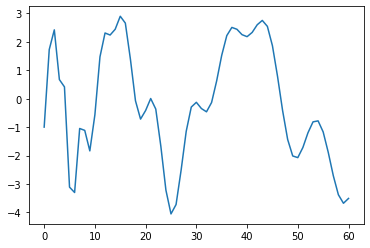

[-3, 2.6092886367152843, 1.547045710246229, 1.3960548836255589, -1.814787139976922, -1.0697684697174845, -1.433648471192815, -2.8027121115298037, -1.5979403326125812, 0.14824484325327242, 0.14327066839681496, -0.09441234476539995, 1.081349108068837, 2.6666965017220536, 2.951885110878215, 1.9694862424558177, 1.0919112181221333, 1.099435003355789, 1.4021062682451022, 0.981032614916899, -0.3811204912012509, -1.9076857383705994, -2.643222749967672, -2.3178364895779624, -1.4879032493534605, -0.9731668800547869, -1.177271143214801, -1.8396603993221154, -2.323126281770162, -2.1296949688517723, -1.240982022467729, -0.08146919853699115, 0.806417619686152, 1.1176254773210819, 0.9417697691790751, 0.6570373573009158, 0.6642400485208513, 1.139910577157136, 1.9467405153789579, 2.7300705359612767, 3.1239044306105375, 2.943626337882549, 2.2675710593269565, 1.3796742147805994, 0.6177318530218321, 0.2111208366542126, 0.18551212627413827, 0.3709956299729241, 0.49861028209824315, 0.3330022130534796, -0.22

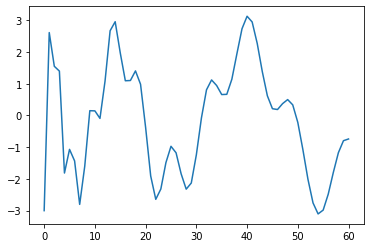

[-1, -0.19149243987387568, 2.360606524173952, -0.6654651765170517, -0.1893809666846875, -0.7290808958742773, -1.04162543754765, -0.8094105983848088, -1.2455956818684844, -1.0275020516007736, 0.43358498299109416, 1.4369996648414087, 0.9408924210555566, 0.07175398818091802, 0.2680135376450788, 1.3972704390252346, 2.1711925106148593, 1.7529837897919243, 0.5059677321897573, -0.6170479491073961, -1.0521200051641861, -0.9618390255551689, -0.8357081428221472, -0.9378103777998207, -1.1318384557617323, -1.1279648311678914, -0.8241291929607836, -0.4185015912656046, -0.2326249563701032, -0.4308825755751411, -0.8721458733970853, -1.195969571098639, -1.064608711494767, -0.38607917804614306, 0.6229229278734622, 1.5593638029155743, 2.054163717807062, 1.9588886844676305, 1.4030328622849626, 0.707267033982295, 0.21342856809768856, 0.12429047562276224, 0.427429487472413, 0.9265258016441771, 1.350366953553768, 1.4795942983862982, 1.233167966368524, 0.6836686262961738, 0.006281305571857528, -0.60635462515

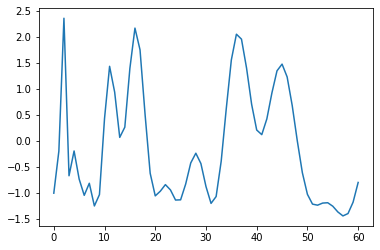

In [100]:
# Autovetores representam os modos naturais de vibração
# Autovalores determinam as frequências

#ponto de parada é t=60
def k(n):
    ki = (40 + 2*n)
    return ki

def mainDiag(n,m):
    A=[]
    for i in range(1,n+1):
        a = (k(i) + k(i+1))/m
        A.append(a)
    return A

def subDiag(n,m):
    B = []
    for i in range(2,n+1):
        b = -k(i)/m
        B.append(b)
    return B

def a(x0, n):
    mat_a=[]
    for i in range(n):
        value = x0[i]
        mat_a.append(value)
    return mat_a

def handley0(x0, V):
    Vt = np.transpose(V)
    y0 = np.dot(Vt, x0)
    return y0

def functionY(t, a, n, A):
      Y =[]
      for i in range(n):
        y = a[i]*math.cos(math.sqrt(A[i]*t))
        Y.append(y)
      return Y

def functionX(t, a, n, j, A, V):
    Y = functionY(t, a, n, A)
    X = np.dot(V[j], Y)
    return X


x0 = [-2, -3, -1, -3, -1]
n = 5 #Quantidade de massas
m = 2 #Massa das massas
desloc = 1
t = 60
erro = 1.0e-6
V = handleV(n)
A = mainDiag(n,m)
B = subDiag(n,m)

A, B, V, k = metodoQR(n, A, B, V, erro, desloc)
print("A", A)
print("V", V)
y0 = handley0(x0, V)
value_a = a(y0, n)

X = []
eixo_y = []
for i in range(t+1):
  eixo_y.append(i)

# for i in range(1, t+1):
#   xi = functionX(i, value_a, n, A, V)
#   X.append(xi)
# print("X", len(X))

# for i in range(n):
#   eixo_x = []
#   eixo_x.append(x0[i])
#   for j in range(t): 
#       eixo_x.append(X[j])
#   print(eixo_x)
#   plt.plot(eixo_y, eixo_x)
#   plt.show()

for j in range(n):
  eixo_x = []
  eixo_x.append(x0[j])
  for i in range(1, t+1):
    xi = functionX(i, value_a, n, j, A, V) 
    eixo_x.append(xi)
  print(eixo_x)
  plt.plot(eixo_y, eixo_x)
  plt.show()

